<a href="https://colab.research.google.com/github/youzzin22/mining2022/blob/main/healthdata_1914611jyj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# health_data 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns

health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB/health_data.csv")
display(health.tail()) 
print(health.info()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021
9999,2020,10000,45,F,13,160,75,100.0,0.5,0.5,...,0.6,32.0,24.0,30.0,NotNow,Yes,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

#BMI지수를 통한 비만도와 질병 분석

## health_data를 이용한 BMI지수 분석

#### BMI계산법은 젊은 성인들에게는 비교적 정확할 수 있지만, 한창 성장기인 아이들이나 노인들은 결과값이 부정확하게 나올 확률이 높기에 성인인 연령대 코드 5부터 70대이상의 노인을 제외한 14까지만 선별하여 df_health를 만들었다.

In [ ]:
df_health = health[health['연령대코드(5세단위)'].isin([5,6,7,8,9,10,11,12,13,14,])]
df_health

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,2020,9994,30,M,12,165,55,81.7,1.0,0.7,...,0.7,25.0,30.0,72.0,No,Yes,0,NaN,NaN,12/29/2021
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021


#### df_health 중 BMI지수를 계산하였다.
BMI지수는 체중/(신장)^2으로 계산하고 BMI column을 만들었다.
또한 저체중 < 18.5 / 정상체중 <22.9 / 과체중 <24.9 / 비만Ⅰ<29.9 / 비만Ⅱ<39.9 / 심각한 비만Ⅲ ≥ 40 으로 구분되기에 BMI지수>=25부터 비만으로 간주하고 fat column을 만들었다.

In [ ]:
df_health['신장(m단위)'] = df_health['신장(5Cm단위)'] *0.01
df_health['BMI'] = df_health.apply(lambda x :x['체중(5Kg 단위)'] / (x['신장(m단위)'] * x['신장(m단위)']),axis=1)
df_health['fat'] = df_health['BMI'] >=25
display(df_health.tail()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,신장(m단위),BMI,fat
9993,2020,9994,30,M,12,165,55,81.7,1.0,0.7,...,72.0,No,Yes,0,NaN,NaN,12/29/2021,1.65,20.202020,False
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,20.0,No,Yes,0,NaN,NaN,12/29/2021,1.55,22.892820,False
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,21.0,No,Yes,1,0.0,0.0,12/29/2021,1.60,21.484375,False
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,35.0,No,No,0,NaN,NaN,12/29/2021,1.60,31.250000,True
9999,2020,10000,45,F,13,160,75,100.0,0.5,0.5,...,30.0,NotNow,Yes,0,NaN,NaN,12/29/2021,1.60,29.296875,True


## 혈청크레아티닌 수치와 비만과의 상관관계

#### 비만은 신장의 기능이 저하 될 것이라 예상하였다.

혈청 크레아티닌 수치의 증감은 음식물에 관계없이 근육의 발육과 운동에 관계하고 이 수치가 정상범위를 넘는 것은 신장 손상으로 인한 신장 기능의 이상을 뜻한다. 따라서 비만은 근육의 발육과 운동 부족의 영향으로 신장의 기능이 저하 될 것이라 예상하였다.

혈청 크레아티닌 수치는 0.5~1.2mg/dL가 정상치라 알려져 있다.

산점도로 BMI지수 25이상을 비만으로 통칭하기에 X축 25이상 Y축은 보기에 용이하기위해 0~2로 설정하여 분석하였다. 그러나 비만에 속하는 사람들의 혈청크레아티닌 수치는 대부분 정상범위에 속하였기에 나의 예측이 엇나간 것을 파악할 수 있었다.


결론적으로 신장 기능과 비만에는 상관성이 없음을 도출 할 수 있다.

In [ ]:
df_health['BMI'].max()

43.7044745057232

[(25.0, 43.7044745057232), (0.0, 2.0)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54000 missing from current font.
  font.set_

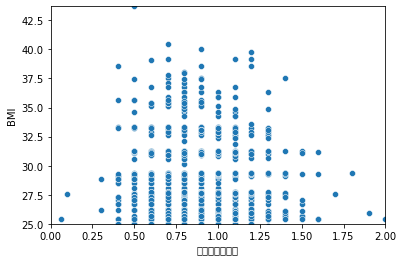

In [ ]:
sns.scatterplot(data = df_health, x = '혈청크레아티닌', y = 'BMI') \
   .set(xlim = (0, 2), ylim = (25,43.7044745057232 ))

##BMI 지수와 허리둘레와의 관계

#### 비만은 일반적으로 허리둘레도 두꺼운 편으로 선 그래프를 통해 결과를 예측해보았다. 

선 그래프를 통해 BMI 지수가 높아질 수록 허리둘레가 두꺼운 것으로 결과가 나왔다. 이는 결론적으로 비만일수록 내장지방도 높자는 것으로 볼 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54728 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47532 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46168 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47112 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 54728 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47532 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 46168 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

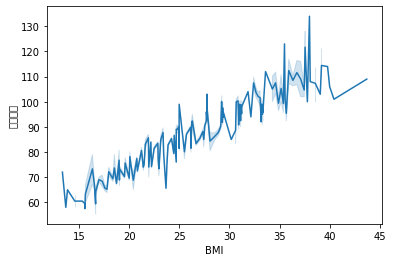

In [ ]:
sns.lineplot(data = df_health, x = 'BMI', y = '허리둘레')

## BMI 지수와 식전열량과 요단백 사이의 관계

#### 비만일수록 당뇨에 걸린 확률이 높다는 통계가 있다. 

당뇨병을 진단받는 식전 혈당의 기준은 126ml/dl 이상이다. 따라서 BMI 지수와 식전혈당 사이의 관계를 통해 비만과 당뇨 사이의 상관관계를 알아보았다. 또한 이러한 결과를 더욱 확실하게 알아보기 위해 BMI지수와 요단백 사이의 상관관계를 파악하여 더욱 결과를 확고히 하려고 예상하였다. 

BMI지수는 25이상을 비만으로 판단한. fat column을 x축으로, Y축은 그래프 각각 식전혈당과 요단백으로 두고 결과를 측정하였다. 

그러나 비만과 비만이 아닌 사람의 결과 차이는 뚜렸하게 나타나지 않는 것으로 나타났다. 따라서 일반적으로 비만은 당뇨병에 걸리기 쉽다는 예측은 틀린것으로 보인다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49885 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51204 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54792 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45817 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44277 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48373 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 49885 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

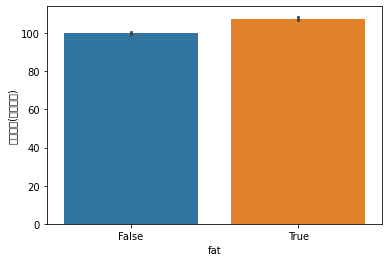

In [ ]:
sns.barplot(data = df_health, x = 'fat', y = '식전혈당(공복혈당)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50836 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45800 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48177 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 50836 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 45800 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48177 missing from current font.



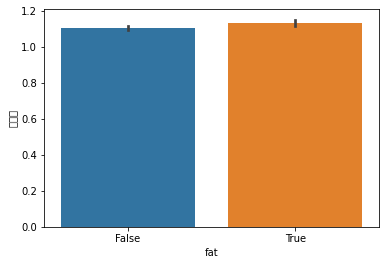

In [ ]:
sns.barplot(data = df_health, x = 'fat', y = '요단백')